# Titanic  

Titanic is the most famous Machine learning competition for the beginners.

Although i already have done it before, I would like to get familiar with  Kaggle  by revising Titanic  

## 1. Pull up the data

First of all, pull up the data and look up the structure of it

In [77]:
import pandas as pd

In [78]:
train= pd.read_csv('Desktop/kaggle/titanic/train.csv', index_col='PassengerId')

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
test=pd.read_csv('Desktop/kaggle/titanic/test.csv', index_col='PassengerId')

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Preprocessing

While Working on a model, which is all the way down below, i found out that values need to be encoded as a number and Nan values need to  be replaced by 0. So i preprocessed some of the  values 

In [127]:
train['Embarked_encoded']=train['Embarked'].replace('S',1).replace('C',2).replace('Q',3).fillna(0)

print(train.shape)
train.head()

(891, 14)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_encoded,Fare_encoded,Age_Criteria
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,7.2500,2.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,71.2833,3.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,7.9250,2.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,53.1000,3.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,8.0500,3.0


In [117]:
test['Embarked_encoded']=test['Embarked'].replace('S',1).replace('C',2).replace('Q',3).fillna(0)

In [82]:
train['Fare_encoded']=train['Fare'].fillna(0)

In [95]:
test['Fare_encoded']=test['Fare'].fillna(0)

## 2. Visualization

To find a Co-relationship and increase the accuracy, It is crucial to visualize the data based on the hypothesis

In [96]:
import seaborn as sns

### 2-1 Relationship between survival and Pclass 

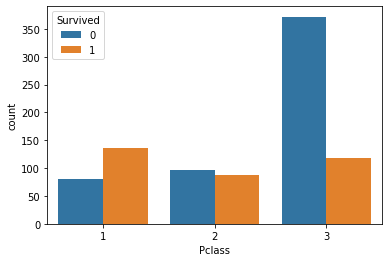

In [97]:
sns.countplot(data=train,x='Pclass', hue='Survived')

Based on the countplot shown above, we can see that As Pclass gets higher(1 is highest), Survival rate increases. Hence, Pclass matters in Survival rate.

## 2-2 Relationship between survival and sex

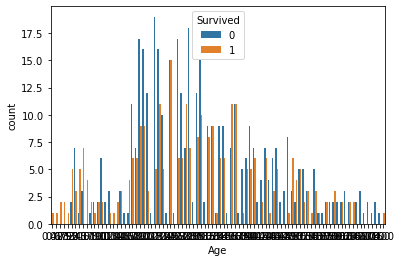

In [98]:
sns.countplot(data=train,x='Age', hue='Survived')

As we can  see from following  graph, it is hard to figure out the  survival rate with following graph.

Hence, i am going to divide the age by 10 to classify the age level.

In [99]:
train['Age_Criteria']=train['Age']//10

print(train.shape)
train.head()

(891, 14)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_encoded,Fare_encoded,Age_Criteria
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,7.2500,2.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,71.2833,3.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,7.9250,2.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,53.1000,3.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,8.0500,3.0


As we can see, Age_Criteria column is added next to the Embarked column.

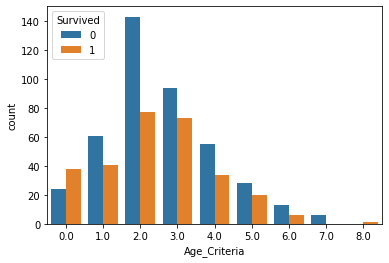

In [100]:
sns.countplot(data=train,x='Age_Criteria', hue='Survived')

It does not seems like  age affects the survival level.

## 2-3  Relationship with port

Since there was a  relationship between Pclass, i assumed that there is a relationship between fare and even port as well.

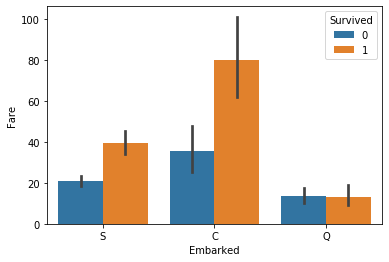

In [101]:
sns.barplot(data=train,x='Embarked', y='Fare',hue='Survived')

As we can see, more amount of fare they paid, there were more survival rate. To utilize Embarked column as a factor, we need to encode it into number so that decision tree  can read it.

# Model

By visualizing several graph with a hypothesis, we have found that Fare,embarked  and PClass impacts the survival rates. Therefore, we will utilize decision tree  tool to predict the values.

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
feature_name= ['Fare_encoded','Pclass', 'Embarked_encoded']
feature_name

['Fare_encoded', 'Pclass', 'Embarked_encoded']

In [134]:
x_train=train[feature_name]

print(x_train.shape)
x_train.head()

(891, 3)


,Fare_encoded,Pclass,Embarked_encoded
PassengerId,,,
1,7.2500,3,1.0
2,71.2833,1,2.0
3,7.9250,3,1.0
4,53.1000,1,1.0
5,8.0500,3,1.0


In [135]:
X_test = test[feature_name]

print(X_test.shape)
X_test.head()

(418, 3)


,Fare_encoded,Pclass,Embarked_encoded
PassengerId,,,
892,7.8292,3,3
893,7.0000,3,1
894,9.6875,2,3
895,8.6625,3,1
896,12.2875,3,1


In [121]:
train[train['Embarked_encoded'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_encoded,Fare_encoded,Age_Criteria
PassengerId,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,NaN,80.0,3.0
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,NaN,80.0,6.0


In [136]:
label='Survived'

In [137]:
y_train=train[label]

In [138]:
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

# training

In [131]:
model= DecisionTreeClassifier(max_depth=5)

model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [139]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Based on the error code i  got, it seems like fare  column is also need to be encoded

# Prediction

In [144]:
prediction=model.predict(X_test)

prediction[:5]

array([0, 0, 1, 0, 0])

# Submission

In [150]:
submission = pd.read_csv('Desktop/kaggle/titanic/gender_submission.csv',
                         index_col='PassengerId')

In [151]:
submission[label] = prediction

submission.head()

,Survived
PassengerId,
892,0
893,0
894,1
895,0
896,0


In [152]:
submission.to_csv('Desktop/kaggle/titanic/gender_submission2.csv')